In [1]:
# Data Preprocessing
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score
from warnings import simplefilter
simplefilter('ignore')

In [2]:
# load the data
dataset = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# checking the missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print(y)

[1 0 1 ... 1 1 0]


In [7]:
# Label encoding the Gender
lb = LabelEncoder()
X[:,2] = lb.fit_transform(X[:,2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [9]:
# Performing One Hot encoding for the Geography coloumn
CT = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(CT.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [11]:
 # Split the data set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=0)

In [12]:
# Feature Scaling for neural network
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Create a ANN
model = keras.Sequential([
    layers.Dense(units = 6, activation='relu'),
    layers.Dense(units = 6, activation='relu'),
    layers.Dense(units = 6, activation='relu'),
    layers.Dense(units=1)
    ])

In [14]:
# compile ANN
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# training the data
history = model.fit(
    X_train,y_train,
    batch_size=256,
    epochs=500,
    verbose=True
)

Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 2.9898 - accuracy: 0.7977
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 2.8134 - accuracy: 0.7977
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 2.6444 - accuracy: 0.7977
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 2.2686 - accuracy: 0.7979
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 2.0897 - accuracy: 0.7971
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 1.9355 - accuracy: 0.7959
Epoch 7/500
28/28 [==============================] - 0s 1ms/step - loss: 1.8090 - accuracy: 0.7944
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 1.7086 - accuracy: 0.7927
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 1.5828 - accuracy: 0.7883
Epoch 10/500
28/28 [==============================] - 0s 1ms/step - loss: 1.4162 - accuracy: 0.7867
Epoch 11/

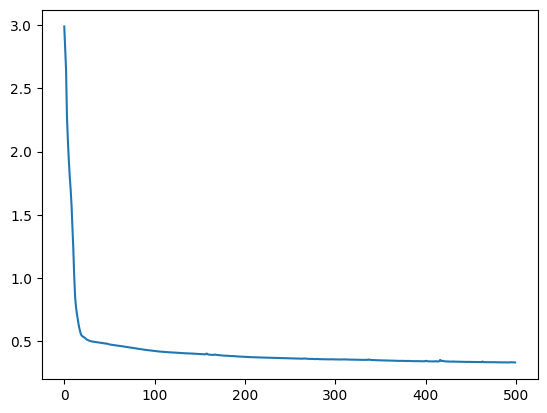

In [16]:
# visualization
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();

In [17]:
print(model.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])))

1/1 [==============================] - 0s 91ms/step
[[0.01351247]]


In [18]:
#Predicting Test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

94/94 [==============================] - 0s 989us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2376    3]
 [ 526   95]]


In [20]:
# Accuracy Score
accuracy_score(y_test,y_pred)

0.8236666666666667